## ResNet50

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np

# Load pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# Create a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a classification layer with 2 labels 
predictions = Dense(2, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.01),
               loss='categorical_crossentropy',
                 metrics=['accuracy'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [18]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 32
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        'D:/Project/Project/train/',
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical')

test_generator = data_generator.flow_from_directory(
        'D:/Project/Project/test/',
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical')

Found 1720 images belonging to 2 classes.


Found 629 images belonging to 2 classes.


In [19]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10


C:\Users\radwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 343ms/step - accuracy: 0.7182 - loss: 31.8704 - val_accuracy: 0.8421 - val_loss: 21.0904
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.9516 - loss: 5.2869 - val_accuracy: 0.8421 - val_loss: 58.2745
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.8273 - loss: 20.9512 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.9260 - loss: 16.4068 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.9844 - loss: 1.7516 - val_accuracy: 0.9474 - val_loss: 2.3453
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.8997 - loss: 17.6410 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 1.0000 - loss: 1.7056e-0

In [20]:
model.save('resNet_model.h5')

In [21]:
# Load the saved model
from tensorflow.keras.models import load_model

# Load the model
model = load_model('resNet_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

629/629 ━━━━━━━━━━━━━━━━━━━━ 60s 90ms/step - accuracy: 0.9985 - loss: 0.2452
Test Loss: 0.49465927481651306
Test Accuracy: 0.995230495929718


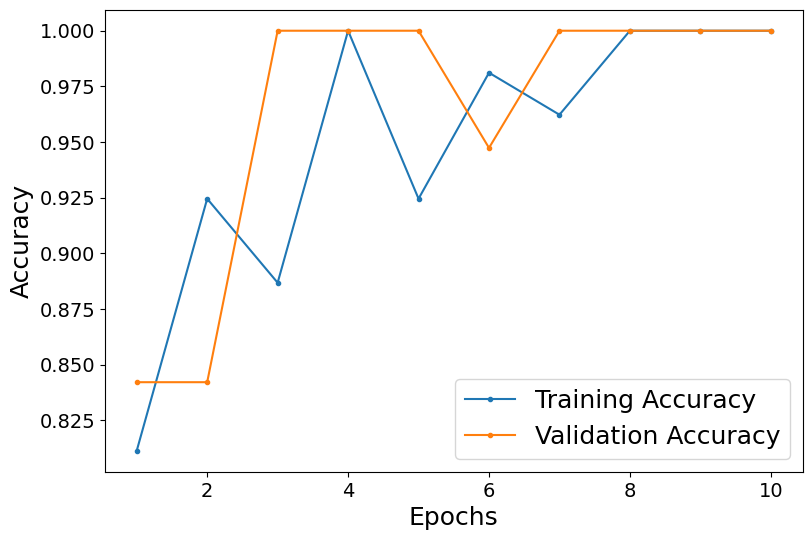

In [22]:
# Extract the loss values from the history
import matplotlib.pylab as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [9, 6]
   }
plt.rcParams.update(params)


# Create a plot to visualize the training and validation loss
#plt.figure(figsize=(5, 3))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', marker='.')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', marker='.')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)

In [23]:
# Success Rate Calculation

In [24]:
correct_identifications_object1 = 0
correct_identifications_object2 = 0

for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    predictions = model.predict(batch_images)
    for j in range(len(batch_labels)):
        if batch_labels[j][0] == 1 and predictions[j][0] >= 0.5:
            correct_identifications_object1 += 1
        elif batch_labels[j][1] == 1 and predictions[j][1] >= 0.5:
            correct_identifications_object2 += 1

# Calculate success rate using the provided law
success_rate = (correct_identifications_object1 + correct_identifications_object2) / 20

print("Success Rate:", success_rate)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [25]:
## Testing Using Unseen Image. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted class: banana


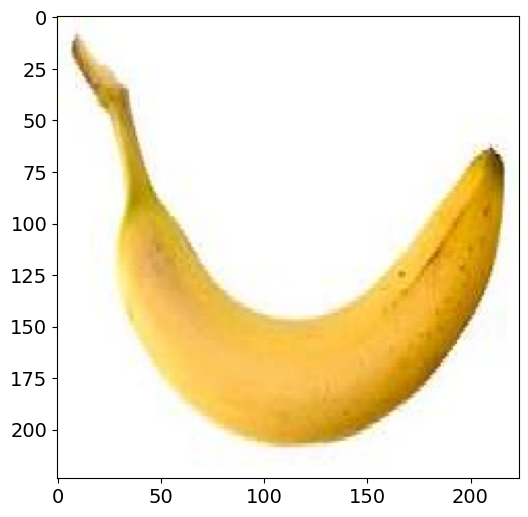

In [26]:
# Load and preprocess the image
# Replace 'path_to_your_image.jpg' with the path to your image
img_path = 'D:\Project\Project\Banana_img_for_test.jpeg'
img = image.load_img(img_path, target_size=(224, 224))  # RESNET 224x224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model.predict(x)
predicted_class = np.argmax(predictions)
class_labels = train_generator.class_indices
predicted_label = [k for k, v in class_labels.items() if v == predicted_class][0]

print(f"Predicted class: {predicted_label}")
plt.imshow(img)